# Image Processing - Filtering <img src='data/images/logo.png' width=50 align='left'> 

author: Thomas Haslwanter\
date: June-2020

## Getting Ready

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Data Filtering

For working with images, a number of different resources exist:

- [ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html): SciPy functions for n-dimensional image processing
- [PIL](http://pillow.readthedocs.org/en/latest/index.html): the Python Image Library (now developed under the name "Pillow"). simple routines to manipulate images: resize, color conversions, simple filtering. Object oriented.
- [scikit-image](http://scikit-image.org/): a very "pythonic" collection of algorithms for image processing
- [opencv](http://opencv.org/): an open source image processing library written in C/C++, and designed for computational efficiency and with a strong focus on real-time applications.

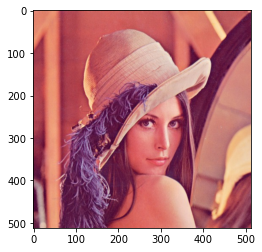

In [2]:
inFile = r'data\images\lena.jpg'
img = plt.imread(inFile)

# If you want the politically correct image,use
#from skimage.data import astronaut
#img = astronaut()
plt.imshow(img)
plt.show()

### Conversiont to Grayscale

When we apply a linear filter to a 2D image, we have to specify on which colorplane it is supposed to act. So the first step is often to convert an image to grayscale.

#### By Hand ...

One way to do this is by hand, using values that correspond to natural human vision. (Remember, we have more green than red receptors in the retina, and more red receptors than blue ones.)

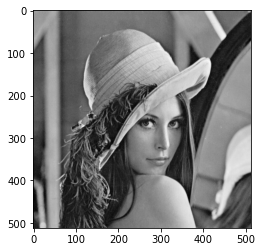

In [3]:
img_g = img.dot([0.2125, 0.7154, 0.0721]).astype(np.uint8)
plt.imshow(img_g)
plt.gray()

#### ..., or by using scikit-image (skimage) ...
The same conversion can be performed with the *scikit-image(skimage)*:

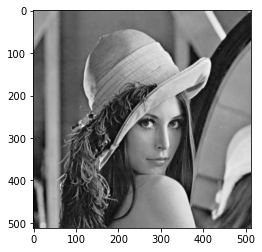

In [4]:
from skimage.color import rgb2gray
img_g_float = rgb2gray(img)
plt.imshow(img_g_float)

#### ..., by using the Python Image Library (PIL)

<class 'numpy.ndarray'>
<PIL.Image.Image image mode=L size=512x512 at 0x1497B4191C8>


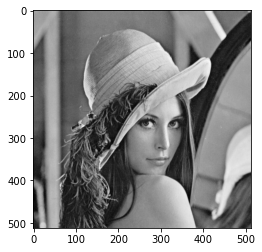

In [5]:
import PIL
pil_img = PIL.Image.fromarray(img)
pil_g = pil_img.convert('L')
plt.imshow(pil_g)

# Note the data-types: PIL provides a PIL-image!
print(type(img))
print(pil_g)

### Linear Filters - I: blurring

An [introduction to image filtereing is given in the wikibook on Sensory Systems](https://en.wikibooks.org/wiki/Sensory_Systems/Computer_Models/Descriptive_Simulations_of_Visual_Information_Processing#2D_Filter).

For the manual application of linear filters, one can use *convolutions*:
http://stackoverflow.com/questions/16121269/2d-convolution-in-python-similar-to-matlabs-conv2

In [6]:
img.dtype

dtype('uint8')

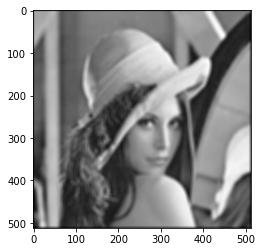

In [7]:
from scipy import ndimage
filter_matrix = np.ones((10,10))/100
img_filtered = ndimage.convolve(img_g_float, filter_matrix, mode='constant', cval=0.0) # in Matlab: imfilter
plt.imshow(img_filtered)

### Linear Filters - II: Edge Detection

#### By Hand, ...

In [8]:
np.max(img_g)

239

In [9]:
img_g_float.dtype

dtype('float64')

[[462 616 615 612 609]
 [  2   0  -3  -4  -3]
 [  3   3   1   0   0]
 [  5   3  -2  -3   0]
 [  0  -2  -4  -2   2]
 [ -9 -11  -9  -7  -6]]
[[206 104 103 100  97]
 [  2   0 253 252 253]
 [  3   3   1   0   0]
 [  5   3 254 253   0]
 [  0 254 252 254   2]
 [247 245 247 249 250]]


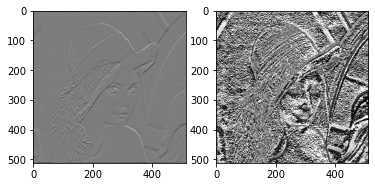

In [10]:
# since the last gray-image was in PIL-format, we first bring it back into
# array form
pil_g = np.array(pil_g)

Filter = np.array([[1, 0, -1],
                [2, 0, -2],
                [1, 0, -1]])

from scipy import ndimage

# WATCH OUT! The image type is important for the result!

img_filtered_int = ndimage.convolve(np.int16(img_g), Filter.T, mode='constant', cval=0.0)
img_filtered_uint8 = ndimage.convolve(img_g, Filter.T, mode='constant', cval=0.0)
#print(np.uint8(img_g)[:5, :5])
print(img_filtered_int[:6, :5])
print(img_filtered_uint8[:6, :5])

'''
# If you want to handle negative numbers and overflows here, you have to do it by hand:
img_filtered_int[img_filtered_int<0] = 0
img_filtered_int[img_filtered_int>255] = 255
img_filtered_uint8 = np.uint8(img_filtered_int)
'''

fig, axs = plt.subplots(1,2)
axs[0].imshow(img_filtered_int)
axs[1].imshow(img_filtered_uint8)

In the example above you see that you have to **really** watch out when working with *unsigned integers*, since filtered uint8-images tend to include values *>255* and *<0*.

Note that different functions handle the edge-areas different, but deliver the same results for the rest of the image, for example:

[[153 460 616 618 616]
 [154 462 616 615 612]
 [  1   2   0  -3  -4]
 [  1   3   3   1   0]
 [  2   5   3  -2  -3]
 [  0   0  -2  -4  -2]]


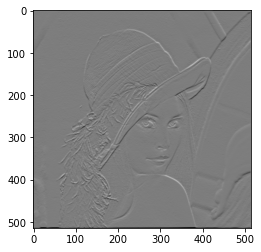

In [11]:
from scipy.signal import convolve2d
from scipy.ndimage import convolve

filtered = convolve2d(img_g, Filter.T)
filtered_b = convolve(img_g, Filter.T)
print(filtered[:6, :5])
plt.imshow(filtered)
#plt.imshow(filtered_b)

#### ... or with scikit-image ...

This is a Python package dedicated to image processing.

http://scikit-image.org/

Note that scikit-image does not have an own 2d linear filter, since this already exists in scipy (see also http://stackoverflow.com/questions/23208232/image-filtering-with-scikit-image)

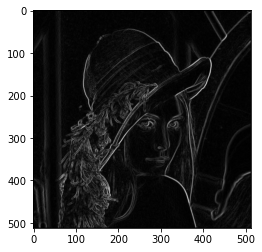

In [12]:
from skimage import filters
filtered = filters.sobel(img_g)
plt.imshow(filtered)

#### ... or with openCV

[[ -0.  -0.  -0.  -0.  -0.]
 [  2.  -0.  -3.  -4.  -3.]
 [  4.   3.   1.  -0.  -0.]
 [  6.   3.  -2.  -3.  -0.]
 [ -0.  -2.  -4.  -2.   2.]
 [-12. -11.  -9.  -7.  -6.]]


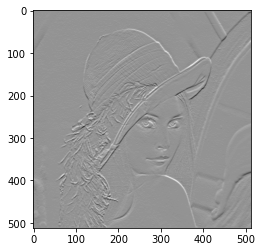

In [13]:
import cv2
filtered = -cv2.filter2D((img_g), cv2.CV_32F, Filter.T)            
plt.imshow(filtered)
print(filtered[:6, :5])

### Nonlinear Filters & Speed Comparison

In the following, I compare "closing" functions from three different packages. "Closing" is a morphological operation, where you first "dilate" and then "erode" and image with a "structuring element". It can be used e.g. to eliminate the eyelids in the image. For more information on morphological operations, see e.g. https://en.wikipedia.org/wiki/Mathematical_morphology.

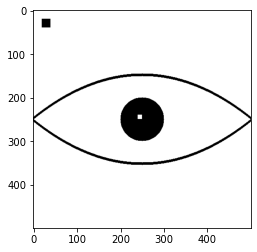

In [15]:
from scipy.ndimage.morphology import binary_closing
from skimage.morphology import closing, square

# From "5_ImgProc_Intro.ipynb"
outFile = 'test.png'

# To keep things simple, let us first generate a binary image
data = plt.imread(outFile)
bw = data[:,:,0]>0.5
bw_uint8 = np.uint8(bw*255)
plt.imshow(bw_uint8)

# Use a square with side-length 20 as "sturctural element"
strel = square(20)

In [16]:
print('Scikit Image:')
%timeit out = closing(bw, strel)

print('Scipy:')
%timeit out = binary_closing(bw, strel)

try:
    import cv2
    print('OpenCV:')
    %timeit out = cv2.morphologyEx(bw_uint8, cv2.MORPH_CLOSE, strel)
except ImportError:
    print('Sorry, could not run OpenCV!')

Scikit Image:
498 ms ± 2.62 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Scipy:
90.1 ms ± 694 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
OpenCV:
448 µs ± 2.55 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


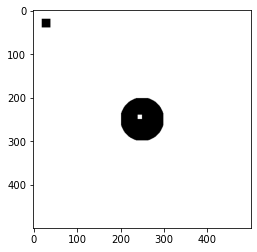

In [17]:
# Just to show you what it looks like:
out = closing(bw_uint8, strel)
plt.imshow(out)

[5_ImgProc_Intro](5_ImgProc_Intro.ipynb)<img src="data\images\Forward_Backward.png" align='middle'>[5_ImgProc_Example_skimage](5_ImgProc_Example_skimage.ipynb)